
-------------------------CONFIGURAR SIMULAÇÃO-------------------------


A fila terá tamanho fixo? (s/n) n
O Tempo entre Chegada será deterministico (d) ou aleatorio (a): a
Escolha o lambda desejado: 40
O Tempo de Serviço será deterministico (d) ou aleatorio (a): a
Escolha o lambda desejado: 10
Quantos eventos você quer que simule: 12



-------------------------INICIANDO SIMULAÇÃO-------------------------


Chegando cliente 1 no operador 0
Evento Chegada | Cliente 1 | TR 0 | ES0 1 | ES1 0 | TF 0 | HC 0.02 | HS0 0.03 | HS1 9999
Chegando cliente 2 no operador 1
Evento Chegada | Cliente 2 | TR 0.02 | ES0 1 | ES1 1 | TF 0 | HC 0.02 | HS0 0.03 | HS1 0.03
Chegando cliente 3, adicionando na fila
Evento Chegada | Cliente 3 | TR 0.02 | ES0 1 | ES1 1 | TF 1 | HC 0.07 | HS0 0.03 | HS1 0.03
Liberando operador 0 e ja adicionando novo serviço à ele
Liberando operador 1 e ja adicionando novo serviço à ele
Evento Saída | Cliente Cliente 3 | TR 0.03 | ES0 1 | ES1 1 | TF -1 | HC 0.07 | HS0 0.15 | HS1 

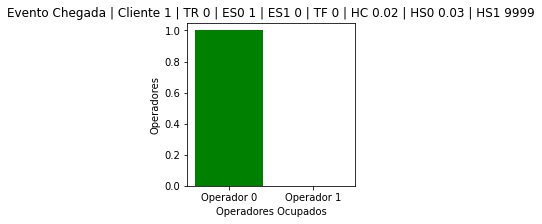

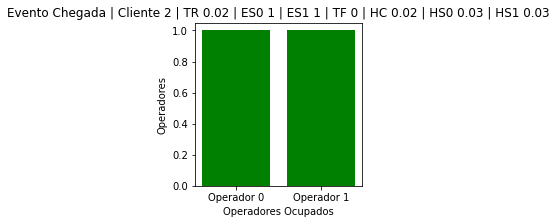

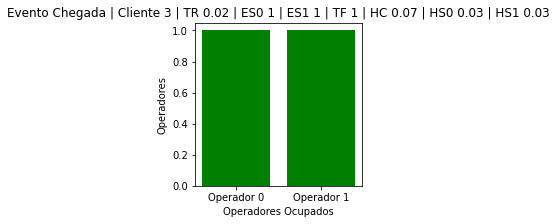

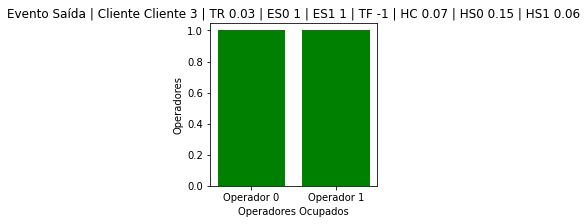

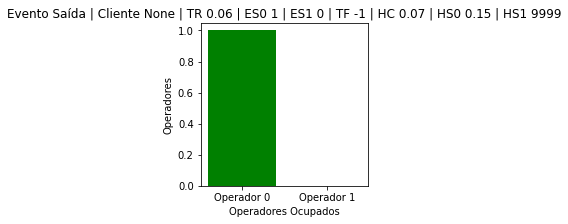

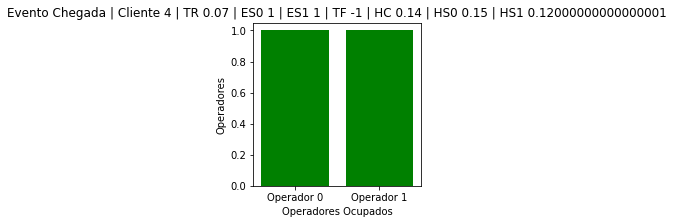

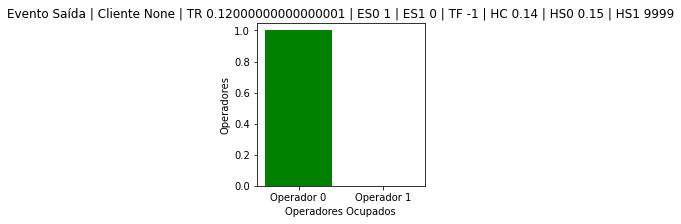

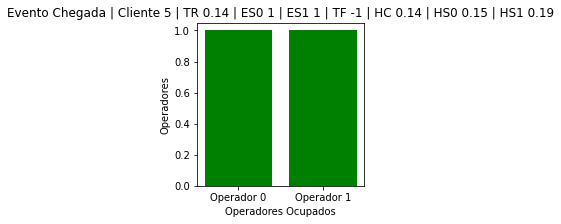

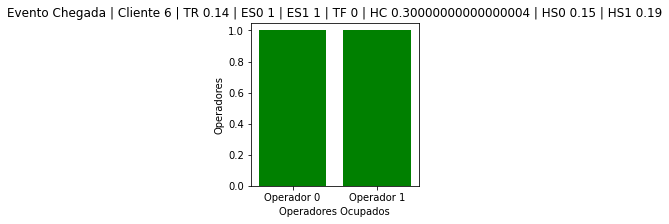

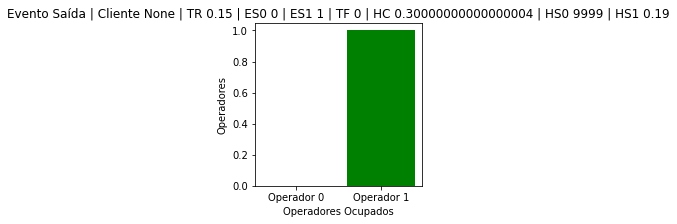

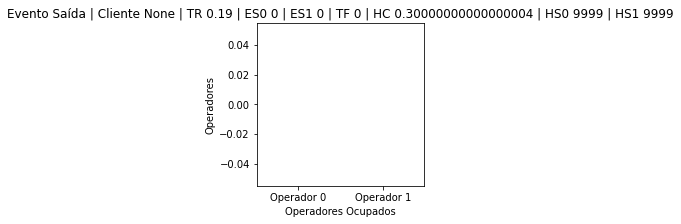

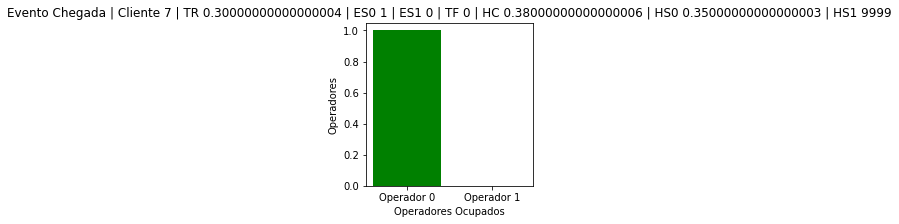

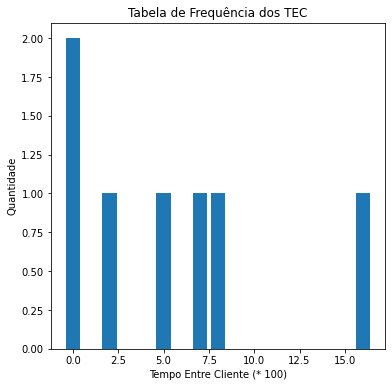

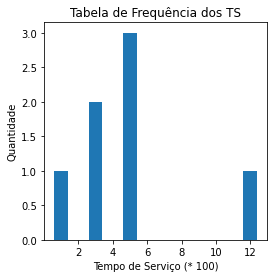

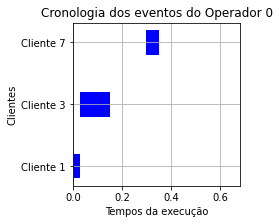

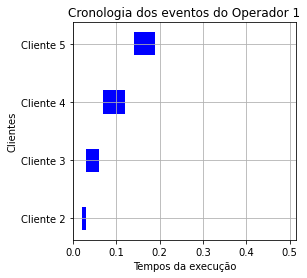

In [2]:
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

class Fila():
  def __init__(self, type_fila, fixa_fila):
    self.nome = []
    self.chega = []
    self.fila_type = type_fila
    self.fila_fixa = fixa_fila
    self.n_fila = 0

class Operador():
  def __init__(self):
    self.nome = []
    self.chega = []
    self.inicioAtd = []
    self.fimAtd = []

class Informacao():
  def __init__(self, type_tec, lambd_tec, type_ts, lambd_ts):
    self.tec = []
    self.ts = []
    self.tec_type = type_tec
    self.tec_lambd = lambd_tec
    self.ts_type = type_ts
    self.ts_lambd = lambd_ts


def generate_var(lamb): # distribuição exponencial
  U = np.random.uniform()
  x = -(1/lamb) * np.log(1-U)
  return np.round(x,2)


def fixArrays(array1, array2):
  while(True):
    if len(array1) < len(array2):
      array2.pop()
    else:
      return


def printStats(op0, op1, time_total):
  fixArrays(op0.inicioAtd, op0.chega)
  fixArrays(op1.inicioAtd, op1.chega)

  npTempoChegadasOp0 = np.array(op0.chega)
  npTempoInicioAtdOp0 = np.array(op0.inicioAtd)
  npTempoTerminoAtdOp0 = np.array(op0.fimAtd)
  npTempoChegadasOp1 = np.array(op1.chega)
  npTempoInicioAtdOp1 = np.array(op1.inicioAtd)
  npTempoTerminoAtdOp1 = np.array(op1.fimAtd)

  tempoTotalEsperaFila = np.sum(npTempoInicioAtdOp0 - npTempoChegadasOp0) + np.sum(npTempoInicioAtdOp1 - npTempoChegadasOp1)
  print('Tempo total de espera na fila =', tempoTotalEsperaFila)

  numeroTotalCliente = len(npTempoChegadasOp0) + len(npTempoChegadasOp1)
  print('Número total de clientes =', numeroTotalCliente)

  numeroClienteEsperaram = 0
  for i in range(len(npTempoChegadasOp0)): #op0
    if npTempoChegadasOp0[i] != npTempoInicioAtdOp0[i]:
      numeroClienteEsperaram += 1
  for i in range(len(npTempoChegadasOp1)): #op1
    if npTempoChegadasOp1[i] != npTempoInicioAtdOp1[i]:
      numeroClienteEsperaram += 1
  print('Numero de clientes que esperaram = ', numeroClienteEsperaram)

  tempoLivreOperador0 = npTempoInicioAtdOp0[0]
  for i in range(len(npTempoChegadasOp0) - 1):
    tempoLivreOperador0 += npTempoInicioAtdOp0[i+1] - npTempoTerminoAtdOp0[i] 
  print('Tempo livre do operadordor 0 =', tempoLivreOperador0)

  if len(npTempoInicioAtdOp1) != 0:
    tempoLivreOperador1 = npTempoInicioAtdOp1[0]
    for i in range(len(npTempoChegadasOp1) - 1):
      tempoLivreOperador1 += npTempoInicioAtdOp1[i+1] - npTempoTerminoAtdOp1[i] 
    print('Tempo livre do operadordor 1 =', tempoLivreOperador1)
  else:
    tempoLivreOperador1 = 0

  print('Tempo livre dos dois operadordores =', tempoLivreOperador0 + tempoLivreOperador1)

  tempoTotalServicoOp0 = np.sum(npTempoTerminoAtdOp0 - npTempoInicioAtdOp0)
  print('Tempo total de serviço =', tempoTotalServicoOp0)

  if len(npTempoInicioAtdOp1) != 0:
    tempoTotalServicoOp1 = np.sum(npTempoTerminoAtdOp1 - npTempoInicioAtdOp1)
    print('Tempo total de serviço =', tempoTotalServicoOp1)
  else:
    tempoTotalServicoOp1 = 0

  print('Tempo total de serviço dos dois operadores =', tempoTotalServicoOp0 + tempoTotalServicoOp1)

  tempoTotalSistema = tempoTotalServicoOp0 + tempoTotalServicoOp1 + tempoLivreOperador0 + tempoLivreOperador1
  print('Tempo total no sistema = ', tempoTotalSistema)

  tempoMedioEsperaFila = (tempoLivreOperador0 + tempoLivreOperador1)/numeroTotalCliente
  print('Tempo médio de espera da fila = ', tempoMedioEsperaFila)

  probClienteEsperaFila = numeroClienteEsperaram/numeroTotalCliente
  print('Probabilidade de um ciente esperar na fila = ', probClienteEsperaFila)

  probOperadorLivre = (tempoLivreOperador0 + tempoLivreOperador1)/time_total
  print('Probabilidade do operador livre = ', probOperadorLivre)

  tempoMedioServico = (tempoTotalServicoOp0 + tempoTotalServicoOp1)/numeroTotalCliente
  print('Tempo médio de serviço = ', tempoMedioServico)

  tempoMedioSistema = tempoTotalSistema/numeroTotalCliente
  print('Tempo médio despendido no sistemas = ', tempoMedioSistema)

def grafico_fila(n_fila, fila_fixa, title):
  percent_ocupation=(n_fila/fila_fixa)*100
  ocupado = percent_ocupation
  n_ocupado = 100 - percent_ocupation

  ind = np.arange(1)
  width = 0.4
  plt.figure(figsize=(10, 2))

  p1 = plt.barh(ind, ocupado, width, color='r')
  p2 = plt.barh(ind, n_ocupado, width, left=ocupado, color='w')

  plt.ylabel('Fila')
  plt.xlabel('Porcentagem da fila ocupada (%)')
  plt.title(title)
  plt.ylim(bottom=-1, top=2)
  plt.yticks(ind, (''))
  plt.plot()

def grafico_ops(state,title=''):
  plt.figure(figsize=(3, 3))
  plt.bar(['Operador 0','Operador 1'], state, color='g')
  plt.ylabel('Operadores')
  plt.xlabel('Operadores Ocupados')
  plt.title(title)
  plt.plot()

def events_op0(op0, time_total):
  fixArrays(op0.inicioAtd, op0.chega)
  size = len(op0.nome)

  ocupado, n_ocupadoD, n_ocupadoE = [], [], []
  for i in range(len(op0.nome)):
    n_ocupadoE.append(op0.inicioAtd[i])
    ocupado.append(op0.fimAtd[i])
    n_ocupadoD.append(time_total)
  
  ind = np.arange(len(op0.nome))
  width = 0.4
  
  n_ocupadoE = tuple(n_ocupadoE)
  ocupado = tuple(ocupado)
  n_ocupadoD = tuple(n_ocupadoD)

  plt.figure(figsize=(size,size))
  plt.barh(ind, n_ocupadoE, width, color='w')
  plt.barh(ind, ocupado, width, left=n_ocupadoE, color='b')
  plt.barh(ind, n_ocupadoD, width, left=ocupado, color='w')
  plt.grid()

  plt.ylabel('Clientes')
  plt.xlabel('Tempos da execução')
  plt.title('Cronologia dos eventos do Operador 0')

  plt.yticks(ind, tuple(op0.nome))
  plt.plot()


def events_op1(op1, time_total):
  fixArrays(op1.inicioAtd, op1.chega)
  size = len(op1.nome)

  ocupado, n_ocupadoD, n_ocupadoE = [], [], []
  for i in range(len(op1.nome)):
    n_ocupadoE.append(op1.inicioAtd[i])
    ocupado.append(op1.fimAtd[i])
    n_ocupadoD.append(time_total)
  print(n_ocupadoD)
  
  ind = np.arange(len(op1.nome))
  width = 0.4
  
  n_ocupadoE = tuple(n_ocupadoE)
  ocupado = tuple(ocupado)
  n_ocupadoD = tuple(n_ocupadoD)

  plt.figure(figsize=(size, size))
  plt.barh(ind, n_ocupadoE, width, color='w')
  plt.barh(ind, ocupado, width, left=n_ocupadoE, color='b')
  plt.barh(ind, n_ocupadoD, width, left=ocupado, color='w')
  plt.grid()

  plt.ylabel('Clientes')
  plt.xlabel('Tempos da execução')
  plt.title('Cronologia dos eventos do Operador 1')

  plt.yticks(ind, tuple(op1.nome))
  plt.plot()

def tec_seq(inf):
  tec_series = pd.Series(inf.tec)
  tec_table_freq = tec_series.value_counts()
  size = len(tec_table_freq)

  plt.figure(figsize=(size, size))
  plt.bar(tec_table_freq.index*100, tec_table_freq.iloc[:])

  plt.ylabel('Quantidade')
  plt.xlabel('Tempo Entre Cliente (* 100)')
  plt.title('Tabela de Frequência dos TEC')
  plt.plot()
  

def ts_seq(inf):
  ts_series = pd.Series(inf.ts)
  ts_table_freq = ts_series.value_counts()
  size = len(ts_table_freq)

  plt.figure(figsize=(size, size))
  plt.bar(ts_table_freq.index*100, ts_table_freq.iloc[:])

  plt.ylabel('Quantidade')
  plt.xlabel('Tempo de Serviço (* 100)')
  plt.title('Tabela de Frequência dos TS')
  plt.plot()
  
def chegada(time, state, hc, hs, op0, op1, f, inf, count):
  time = hc
  count += 1
  cliente = count

  if state[0] == 0: # chega e inicia o serviço no state 0
    print(f"Chegando cliente {count} no operador 0")
    state[0] = 1
    if inf.ts_type == 'd' or inf.ts_type == 'D':
      ts = float(input("\tQual o TS: "))
    else:
      ts = generate_var(inf.ts_lambd)
    hs[0] = time + ts
    inf.ts.append(ts)
    
    op0.nome.append('Cliente ' + str(count))
    op0.chega.append(hc)
    op0.inicioAtd.append(time)
    op0.fimAtd.append(hs[0])

  elif state[1] == 0: # chega e inicia o serviço no state 1
    print(f"Chegando cliente {count} no operador 1")
    state[1] = 1
    if inf.ts_type == 'd' or inf.ts_type == 'D':
      ts = float(input("\tQual o TS: "))
    else:
      ts = generate_var(inf.ts_lambd)
    hs[1] = time + ts
    inf.ts.append(ts)
    
    op1.nome.append('Cliente ' + str(count))
    op1.chega.append(hc)
    op1.inicioAtd.append(time)
    op1.fimAtd.append(hs[1])
    
  else: # chega mas n inicia o serviço
    print(f"Chegando cliente {count}, adicionando na fila")
    if f.n_fila < f.fila_fixa:
      f.nome.append('Cliente ' + str(count))
      f.chega.append(hc)
      f.n_fila = f.n_fila + 1
    else:
      print('FILA LOTADA!!!')
    
  # proximo evento chegada ocorrera no tempo time+tec
  if inf.tec_type == 'd' or inf.tec_type == 'D':
    tec = float(input("Qual a TEC: "))
  else:
    tec = generate_var(inf.tec_lambd)
  hc = time + tec
  inf.tec.append(tec)

  return time, state, hc, hs, cliente, count


def saida(time, state, hc, hs, op0, op1, f, inf):
  if hs[0]<hs[1]:
    time = hs[0]
  else:
    time = hs[1]
  cliente = None

  if f.n_fila>0: # finaliza o serviço atual e inicia o proximo

    if time == hs[0]: # finaliza o serviço no state 0 e inicia outro
      print('Liberando operador 0 e ja adicionando novo serviço à ele')
      f.n_fila = f.n_fila - 1
      if inf.ts_type == 'd' or inf.ts_type == 'D':
        ts = float(input("\tQual o TS: "))
      else:
        ts = generate_var(inf.ts_lambd)
      hs[0] = time + ts
      inf.ts.append(ts)

      # pegar as info das filas
      op0.nome.append(f.nome[0])
      op0.chega.append(f.chega[0])
      op0.inicioAtd.append(time)
      op0.fimAtd.append(hs[0])

    if time == hs[1]: # finaliza o serviço no state 1 e inicia outro
      print('Liberando operador 1 e ja adicionando novo serviço à ele')
      f.n_fila = f.n_fila - 1
      if inf.ts_type == 'd' or inf.ts_type == 'D':
        ts = float(input("\tQual o TS: "))
      else:
        ts = generate_var(inf.ts_lambd)
      hs[1] = time + ts
      inf.ts.append(ts)

      # pegar as info das filas
      op1.nome.append(f.nome[0])
      op1.chega.append(f.chega[0])
      op1.inicioAtd.append(time)
      op1.fimAtd.append(hs[1])
    
    cliente = f.nome[0]
    del f.nome[0]
    del f.chega[0]

  else: # finaliza o atual

    if time == hs[0]: # finaliza o serviço no state 1
      print('Liberando operador 0')
      state[0] = 0
      hs[0] = 9999

    if time == hs[1]: # finaliza o serviço no state 0
      print('Liberando operador 1')
      state[1] = 0
      hs[1] = 9999

  return time, state, hc, hs, cliente


def simu(n_simu, op0, op1, f, inf):
  time, state, hc, hs, count = 0, [0,0], 0, [9999,9999], 0
  
  for n in range(n_simu):
    
    # qual o proximo evento? de chegada ou saida?
    if hc<hs[0] and hc<hs[1]:
      time, state, hc, hs, cliente, count = chegada(time, state, hc, hs, op0, op1, f, inf, count)
      title = f"Evento Chegada | Cliente {cliente} | TR {time} | " + \
            f"ES0 {state[0]} | ES1 {state[1]} | TF {f.n_fila} | HC {hc} | HS0 {hs[0]} | HS1 {hs[1]}"
      
    else:
      time, state, hc, hs, cliente = saida(time, state, hc, hs, op0, op1, f, inf)
      title = f"Evento Saída | Cliente {cliente} | TR {time} " + \
            f"| ES0 {state[0]} | ES1 {state[1]} | TF {f.n_fila} | HC {hc} | HS0 {hs[0]} | HS1 {hs[1]}"

    print(title)
    sleep(time*10)

    if f.fila_fixa != np.inf and n != n_simu:
      grafico_fila(f.n_fila, f.fila_fixa, title)
      grafico_ops(state)
    else:
      grafico_ops(state, title)

  return time


def main():
  print('\n-------------------------CONFIGURAR SIMULAÇÃO-------------------------\n\n')

  fila_type = input("A fila terá tamanho fixo? (s/n) ")
  if fila_type == 's' or fila_type == 'S':
    fila_fixa = int(input('Qual o tamanho: '))
  else:
    fila_fixa = np.inf

  tec_type = input("O Tempo entre Chegada será deterministico (d) ou aleatorio (a): ")
  if tec_type == 'a' or tec_type == 'A':
    tec_lambd = int(input("Escolha o lambda desejado: "))
  else:
    tec_lambd = -1

  ts_type = input("O Tempo de Serviço será deterministico (d) ou aleatorio (a): ")
  if ts_type == 'a' or ts_type == 'A':
    ts_lambd = int(input("Escolha o lambda desejado: "))
  else:
    ts_lambd = -1

  n_simu = int(input("Quantos eventos você quer que simule: "))
  op0 = Operador()
  op1 = Operador()
  f = Fila(fila_type, fila_fixa)
  inf = Informacao(tec_type, tec_lambd, ts_type, ts_lambd)

  print('\n\n\n-------------------------INICIANDO SIMULAÇÃO-------------------------\n\n')
  time_total = simu(n_simu, op0, op1, f, inf)
  
  print('\n\n\n-------------------------RELATORIO FINAL-------------------------\n\n')
  printStats(op0, op1, time_total)
  tec_seq(inf)
  ts_seq(inf)
  events_op0(op0, time_total)
  events_op1(op1, time_total)


main()